In [52]:
import cv2
import os
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D

In [34]:
def convert_to_grayscale(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def resize_image(img, dim=(224, 224)):
    return cv2.resize(img, dim, interpolation=cv2.INTER_AREA)

In [35]:
input_folder = "/Users/thienphuong/Desktop/DATA-4381-Capstone-Project/dog-breeds/"
output_folder = "/Users/thienphuong/Desktop/DATA-4381-Capstone-Project/dog-breeds/processed_images_tsne"

if not os.path.exists(output_folder):
    os.makedirs(output_folder)

In [36]:
image_files = []
images_for_emb = []
image_labels = []

breed_folders = [f for f in os.listdir(input_folder) if os.path.isdir(os.path.join(input_folder, f))]


for breed_folder in breed_folders:
    breed_path = os.path.join(input_folder, breed_folder)
    image_extensions = ['.jpg', '.png', '.jpeg']
    
    breed_image_files = [f for f in os.listdir(breed_path) if any(f.lower().endswith(ext) for ext in image_extensions)]
    
    for image_file in tqdm(breed_image_files):
        img_path = os.path.join(breed_path, image_file)
        img = cv2.imread(img_path)
        
        if img is None:
            print(f"Failed to load {img_path}")
            continue

        # Populate the image_files list with tuples
        image_files.append((breed_folder, image_file))
        
        # Convert to grayscale and resize
        gray_img = convert_to_grayscale(img)
        resized_gray_img = resize_image(gray_img)
        
        #print(resized_gray_img.shape)
        
        # Save the processed image
        breed_output_folder = os.path.join(output_folder, breed_folder)
        if not os.path.exists(breed_output_folder):
            os.makedirs(breed_output_folder)
        
        output_path = os.path.join(breed_output_folder, image_file)
        cv2.imwrite(output_path, resized_gray_img)
        
        images_for_emb.append(resized_gray_img.reshape(-1))
        image_labels.append(breed_folder)  # adding the breed label for each image
        

100%|██████████████████████████████████████████| 83/83 [00:00<00:00, 101.89it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
100%|██████████████████████████████████████████| 76/76 [00:00<00:00, 119.93it/s]
0it [00:00, ?it/s]
100%|██████████████████████████████████████████| 50/50 [00:00<00:00, 102.47it/s]


In [38]:
label_to_color = {
    'rottweiler': 'r',
    'dalmatian': 'g',
    'german-shepherd': 'b',
    'beagle': 'c',
    'husky': 'm',
    'poodle': 'y',
    'bulldog': 'k',
    'labrador-retriever': 'orange',
}

X = np.array(images_for_emb)

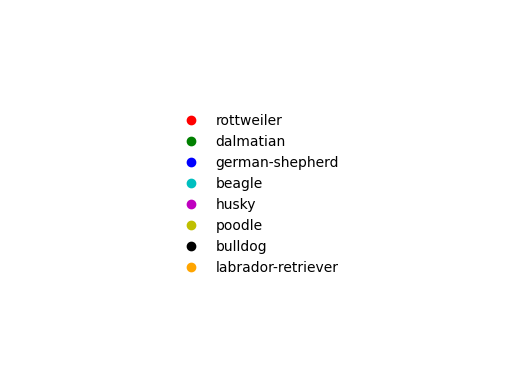

In [46]:
proxy_artists = []
for label, color in label_to_color.items():
    proxy_artists.append(plt.Line2D([0], [0], linestyle='none', marker='o', color=color, label=label))
# Legend
plt.legend(handles=proxy_artists, loc='center', frameon=False)
plt.axis('off') 
plt.show()

/var/folders/2x/m3nyg7x50mzg_7wsnzcm7hxr0000gn/T/ipykernel_3385/406096109.py:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(1, len(n_components_values), i + 1, projection='3d')


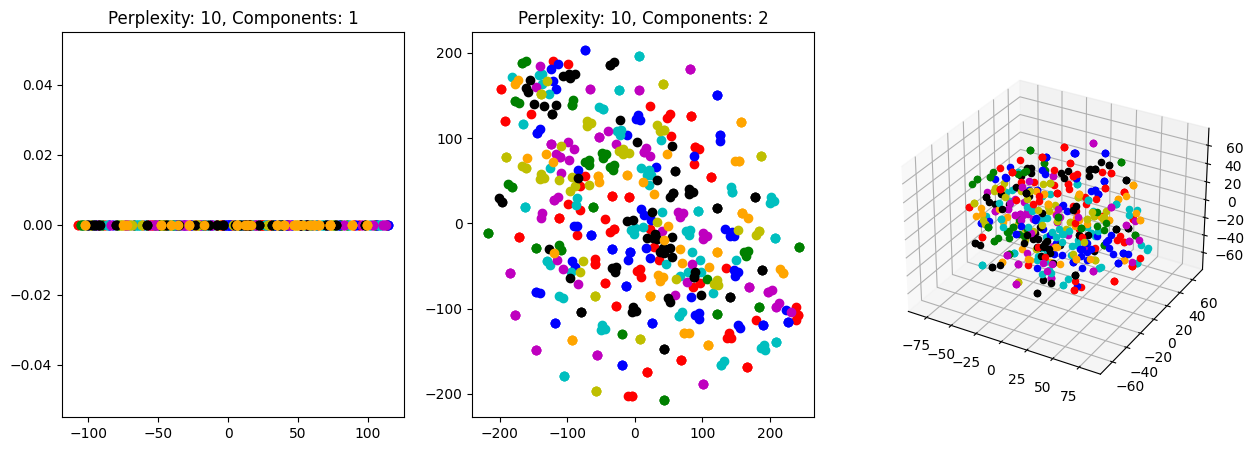

/var/folders/2x/m3nyg7x50mzg_7wsnzcm7hxr0000gn/T/ipykernel_3385/406096109.py:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(1, len(n_components_values), i + 1, projection='3d')


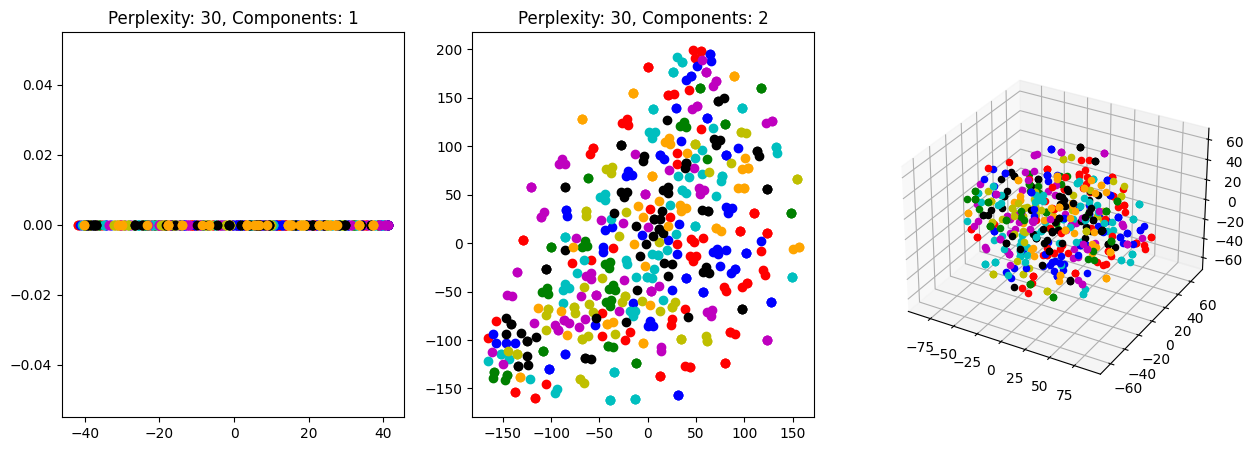

/var/folders/2x/m3nyg7x50mzg_7wsnzcm7hxr0000gn/T/ipykernel_3385/406096109.py:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(1, len(n_components_values), i + 1, projection='3d')


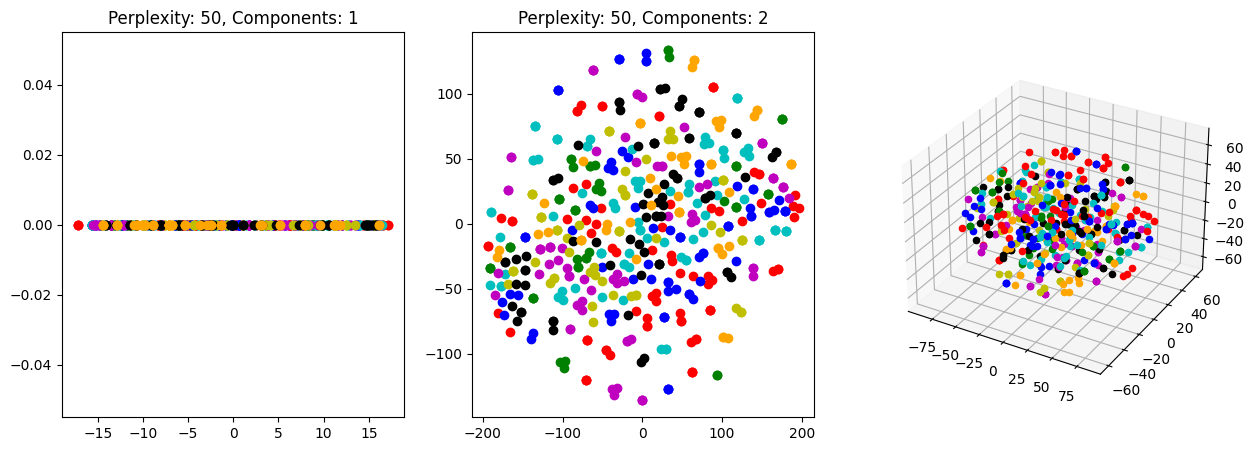

/var/folders/2x/m3nyg7x50mzg_7wsnzcm7hxr0000gn/T/ipykernel_3385/406096109.py:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(1, len(n_components_values), i + 1, projection='3d')


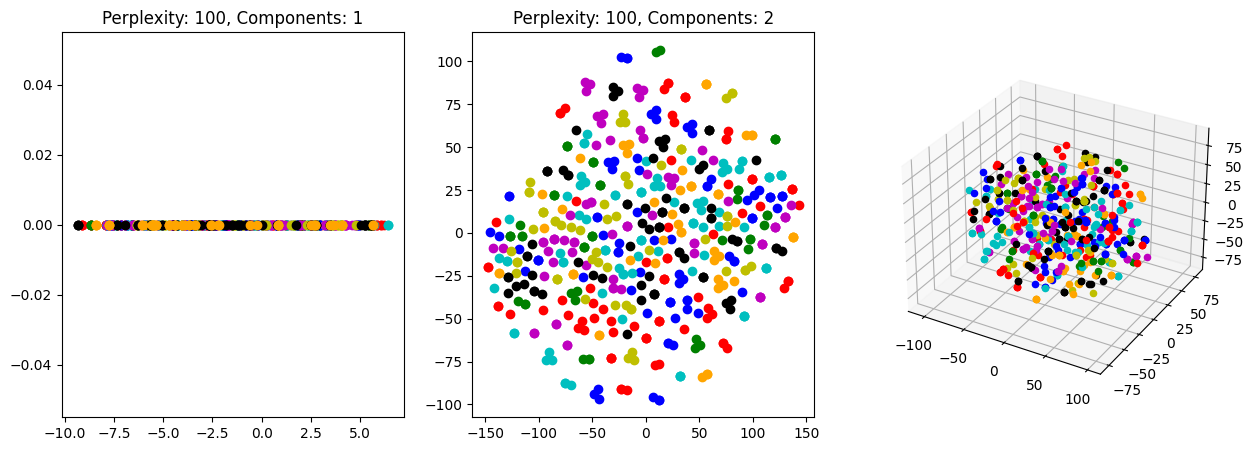

In [55]:
n_perplexity_values = [10, 30, 50, 100]
n_components_values = [1, 2, 3]

for perplexity_val in n_perplexity_values:
    plt.figure(figsize=(15, 5))
    
    for i, n_components_val in enumerate(n_components_values):
        tsne = TSNE(n_components = n_components_val, perplexity = perplexity_val, random_state=42)
        X_tsne = tsne.fit_transform(X)
        
        plt.subplot(1, len(n_components_values), i + 1)
        plt.title(f'Perplexity: {perplexity_val}, Components: {n_components_val}')
        
        if n_components_val == 1:
            for point, label in zip(X_tsne, image_labels):
                plt.scatter(point[0], 0, color=label_to_color.get(label, 'gray'))
                
        elif n_components_val == 2:
            for point, label in zip(X_tsne, image_labels):
                plt.scatter(point[0], point[1], color=label_to_color.get(label, 'gray'))

        elif n_components_val == 3:
            ax = plt.subplot(1, len(n_components_values), i + 1, projection='3d')
            for point, label in zip(X_tsne, image_labels):
                ax.scatter(point[0], point[1], point[2], c=label_to_color.get(label, 'gray'))
                
                
    plt.show()

In [40]:
from sklearn.manifold import LocallyLinearEmbedding

/var/folders/2x/m3nyg7x50mzg_7wsnzcm7hxr0000gn/T/ipykernel_3385/3740033645.py:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(1, len(n_components_values), i + 1, projection='3d')


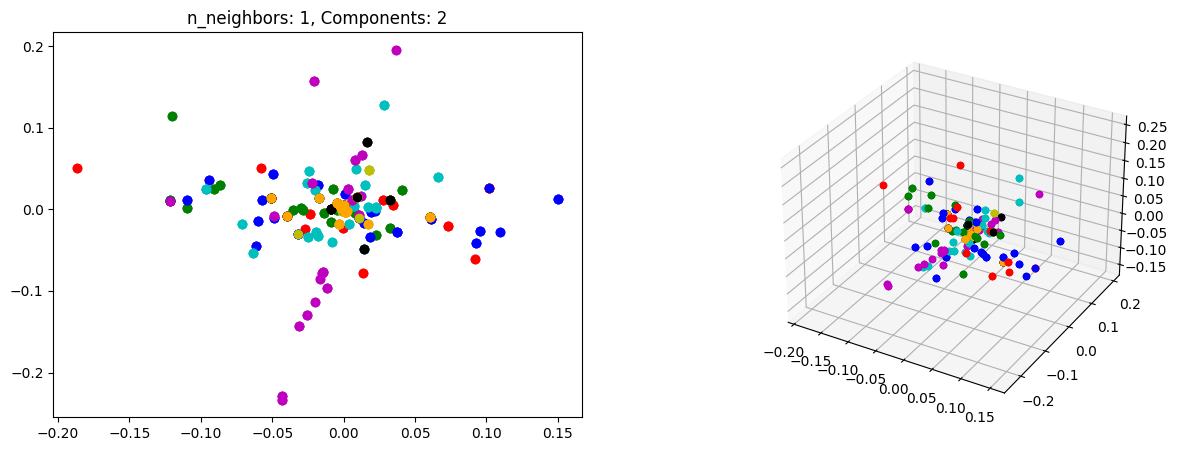

/var/folders/2x/m3nyg7x50mzg_7wsnzcm7hxr0000gn/T/ipykernel_3385/3740033645.py:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(1, len(n_components_values), i + 1, projection='3d')


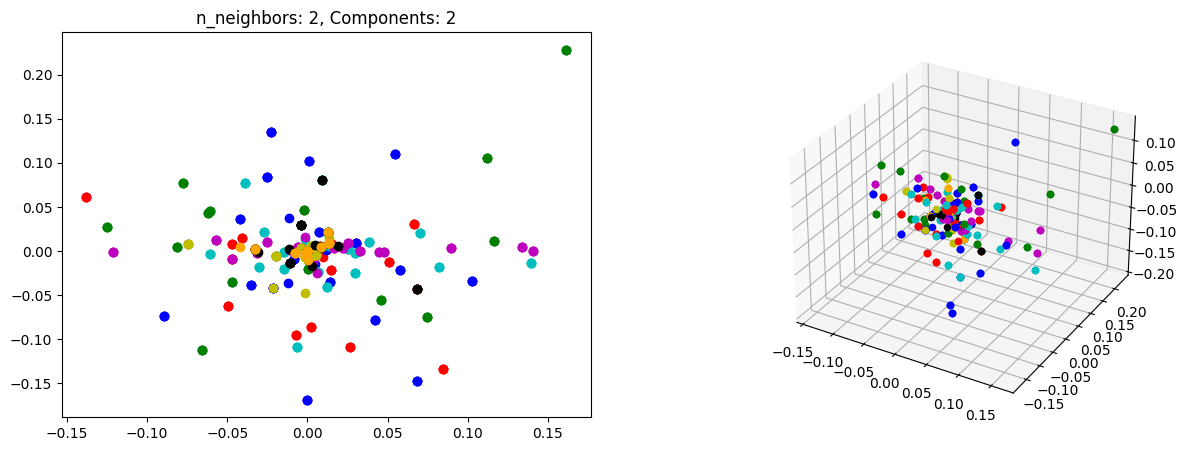

/var/folders/2x/m3nyg7x50mzg_7wsnzcm7hxr0000gn/T/ipykernel_3385/3740033645.py:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(1, len(n_components_values), i + 1, projection='3d')


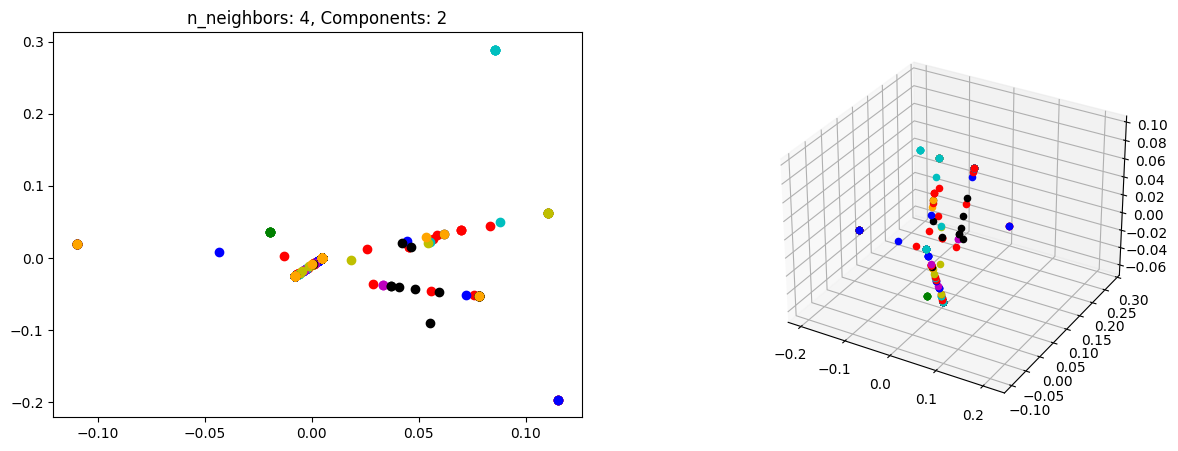

/var/folders/2x/m3nyg7x50mzg_7wsnzcm7hxr0000gn/T/ipykernel_3385/3740033645.py:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(1, len(n_components_values), i + 1, projection='3d')


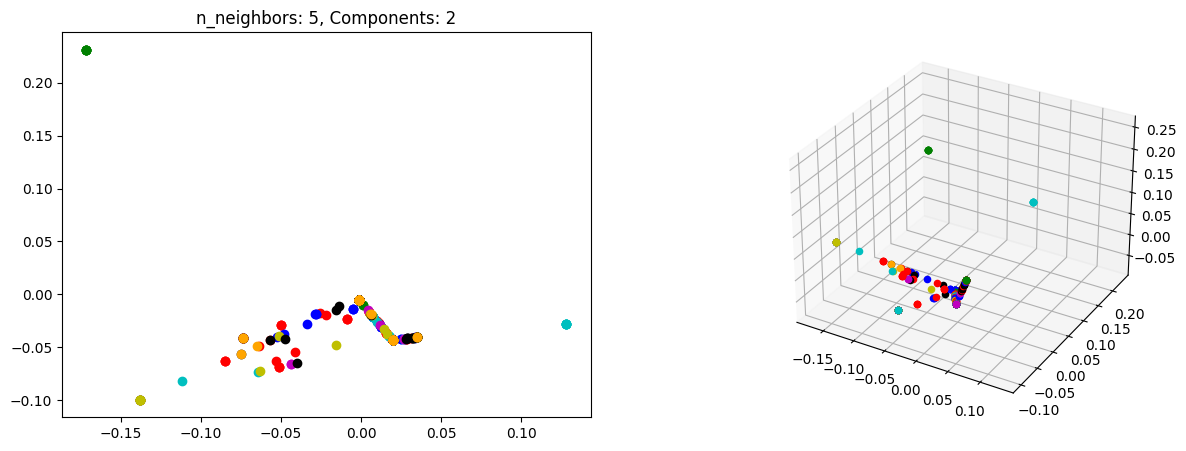

/var/folders/2x/m3nyg7x50mzg_7wsnzcm7hxr0000gn/T/ipykernel_3385/3740033645.py:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(1, len(n_components_values), i + 1, projection='3d')


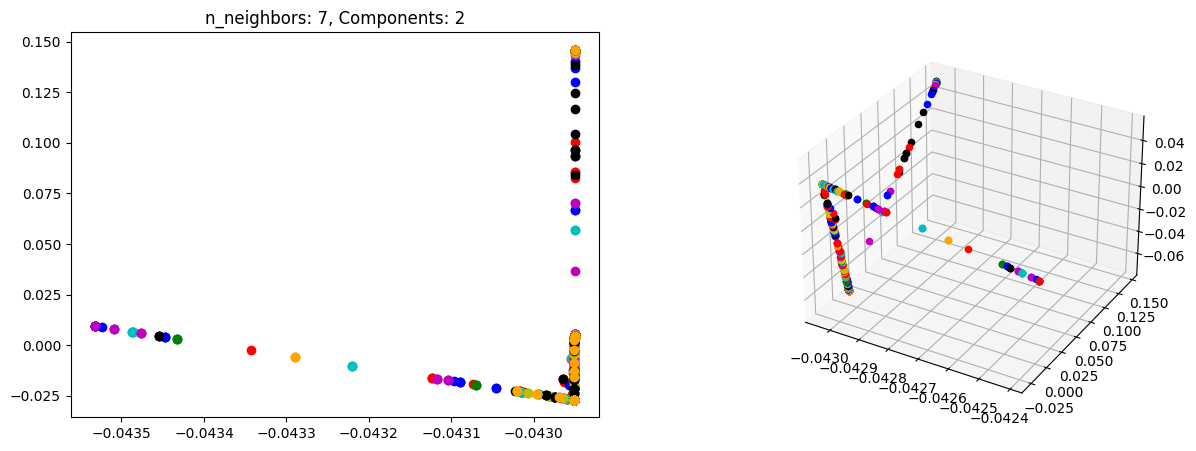

In [59]:
n_neighbors_values = [ 1 ,2, 4, 5, 7]
n_components_values = [2, 3]

for n_neighbors_val in n_neighbors_values:
    plt.figure(figsize=(15, 5))
    
    for i, n_components_val in enumerate(n_components_values):
        lle = LocallyLinearEmbedding(n_components=n_components_val, n_neighbors=n_neighbors_val, random_state=None , eigen_solver='dense')
        X_lle = lle.fit_transform(X)
        
        plt.subplot(1, len(n_components_values), i + 1)
        plt.title(f'n_neighbors: {n_neighbors_val}, Components: {n_components_val}')
        
        if n_components_val == 1:
            for point, label in zip(X_lle, image_labels):
                plt.scatter(point[0], 0, color=label_to_color.get(label, 'gray'))
                
        elif n_components_val == 2:
            for point, label in zip(X_lle, image_labels):
                plt.scatter(point[0], point[1], color=label_to_color.get(label, 'gray'))
                
        elif n_components_val == 3:
            ax = plt.subplot(1, len(n_components_values), i + 1, projection='3d')
            for point, label in zip(X_lle, image_labels):
                ax.scatter(point[0], point[1], point[2], c=label_to_color.get(label, 'gray'))
                
    plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/sparse/linalg/_eigen/arpack/arpack.py:939: LinAlgWarning: Diagonal number 3 is exactly zero. Singular matrix.
  self.M_lu = lu_factor(M)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/sparse/linalg/_eigen/arpack/arpack.py:939: LinAlgWarning: Diagonal number 3 is exactly zero. Singular matrix.
  self.M_lu = lu_factor(M)
/var/folders/2x/m3nyg7x50mzg_7wsnzcm7hxr0000gn/T/ipykernel_3385/3209832992.py:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(1, len(n_components_values), i + 1, projection='3d')


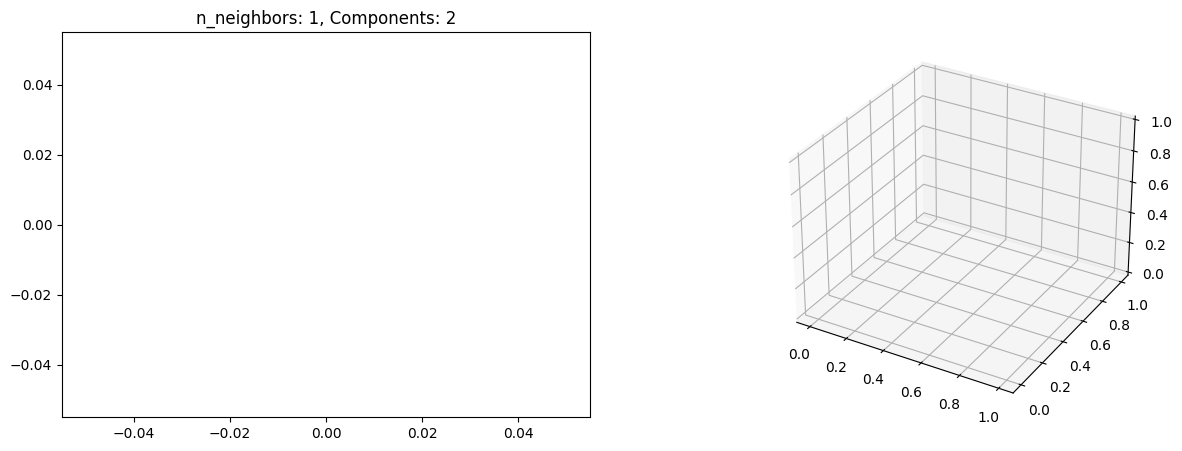

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/sparse/linalg/_eigen/arpack/arpack.py:939: LinAlgWarning: Diagonal number 3 is exactly zero. Singular matrix.
  self.M_lu = lu_factor(M)


ValueError: could not broadcast input array from shape (2,2) into shape (2,3)

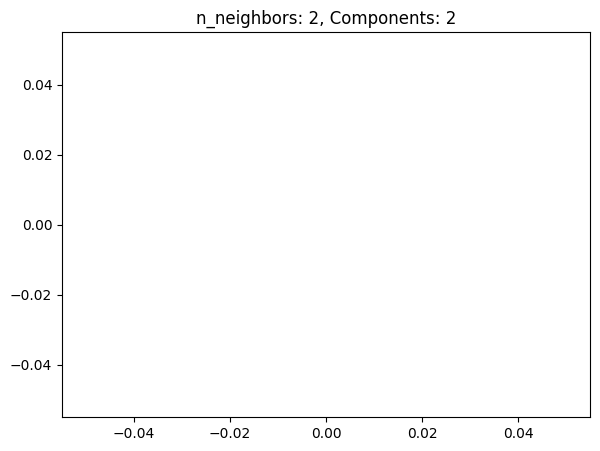

In [61]:
n_neighbors_values = [ 1 ,2, 4, 5, 7]
n_components_values = [2, 3]

for n_neighbors_val in n_neighbors_values:
    plt.figure(figsize=(15, 5))
    
    for i, n_components_val in enumerate(n_components_values):
        lle = LocallyLinearEmbedding(n_components=n_components_val, n_neighbors=n_neighbors_val, random_state=None , method='ltsa')
        X_lle = lle.fit_transform(X)
        
        plt.subplot(1, len(n_components_values), i + 1)
        plt.title(f'n_neighbors: {n_neighbors_val}, Components: {n_components_val}')
        
        if n_components_val == 1:
            for point, label in zip(X_lle, image_labels):
                plt.scatter(point[0], 0, color=label_to_color.get(label, 'gray'))
                
        elif n_components_val == 2:
            for point, label in zip(X_lle, image_labels):
                plt.scatter(point[0], point[1], color=label_to_color.get(label, 'gray'))
                
        elif n_components_val == 3:
            ax = plt.subplot(1, len(n_components_values), i + 1, projection='3d')
            for point, label in zip(X_lle, image_labels):
                ax.scatter(point[0], point[1], point[2], c=label_to_color.get(label, 'gray'))
                
    plt.show()

In [49]:
from sklearn.manifold import SpectralEmbedding

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/var/folders/2x/m3nyg7x50mzg_7wsnzcm7hxr0000gn/T/ipykernel_3385/1104444180.py:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(1, len(n_components_values), i + 1, projection='3d')


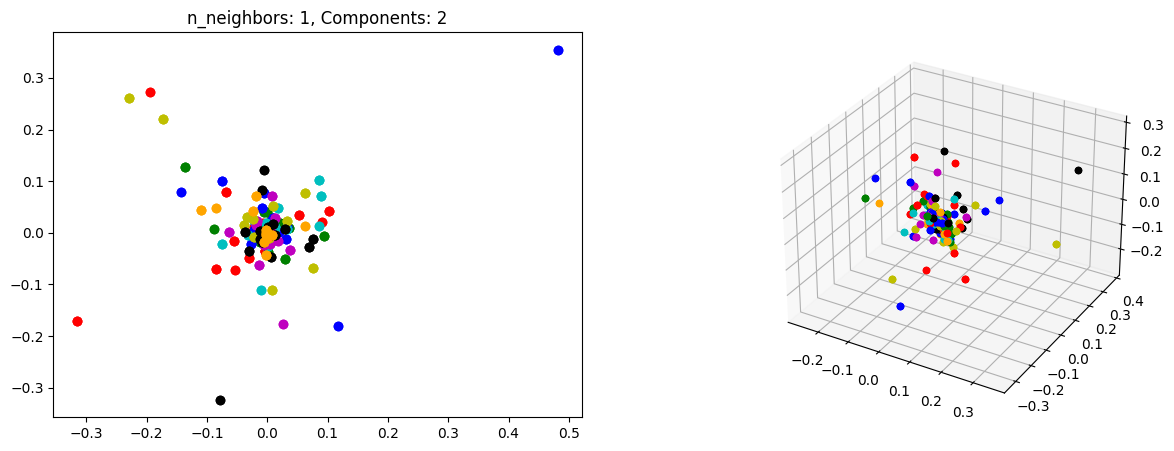

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/var/folders/2x/m3nyg7x50mzg_7wsnzcm7hxr0000gn/T/ipykernel_3385/1104444180.py:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(1, len(n_components_values), i + 1, projection='3d')


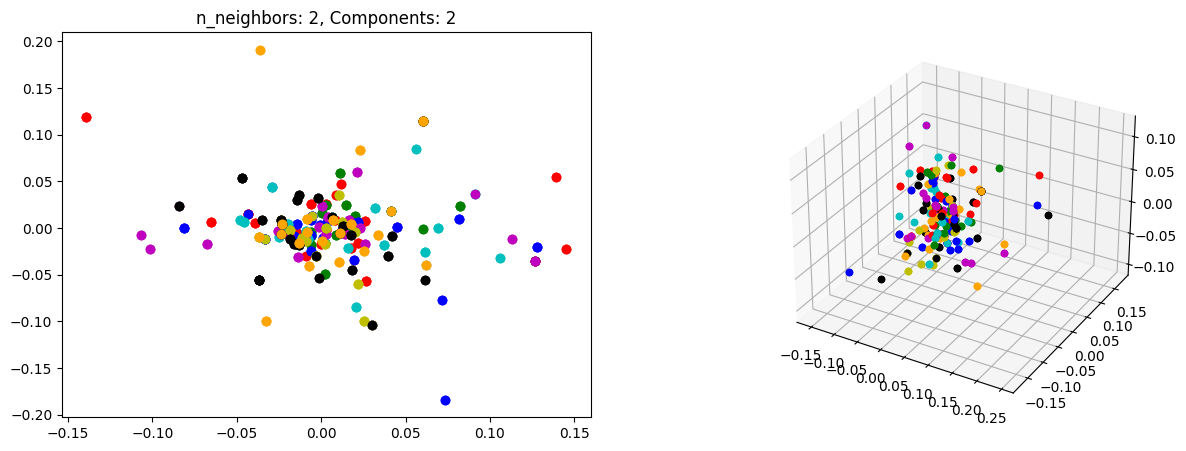

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/var/folders/2x/m3nyg7x50mzg_7wsnzcm7hxr0000gn/T/ipykernel_3385/1104444180.py:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(1, len(n_components_values), i + 1, projection='3d')


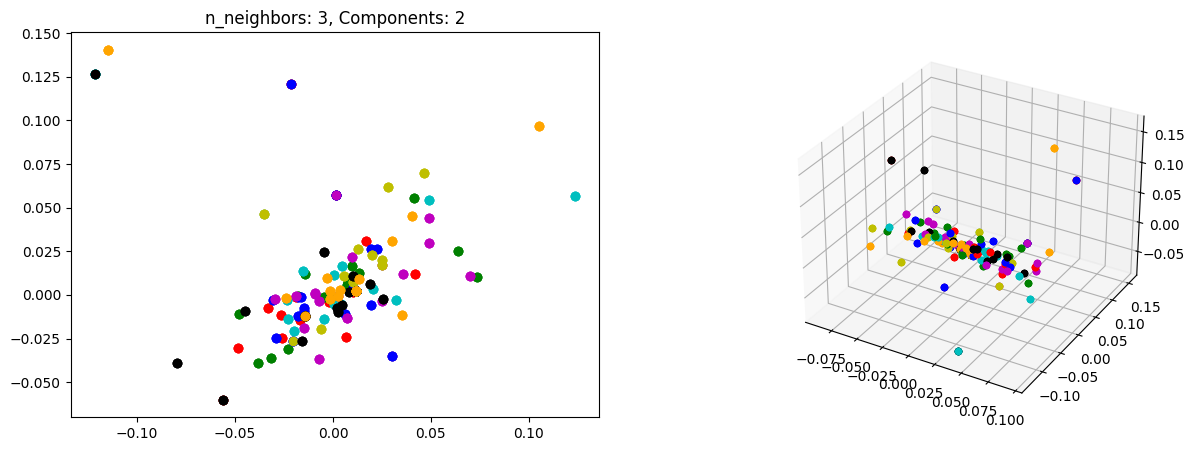

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/var/folders/2x/m3nyg7x50mzg_7wsnzcm7hxr0000gn/T/ipykernel_3385/1104444180.py:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(1, len(n_components_values), i + 1, projection='3d')


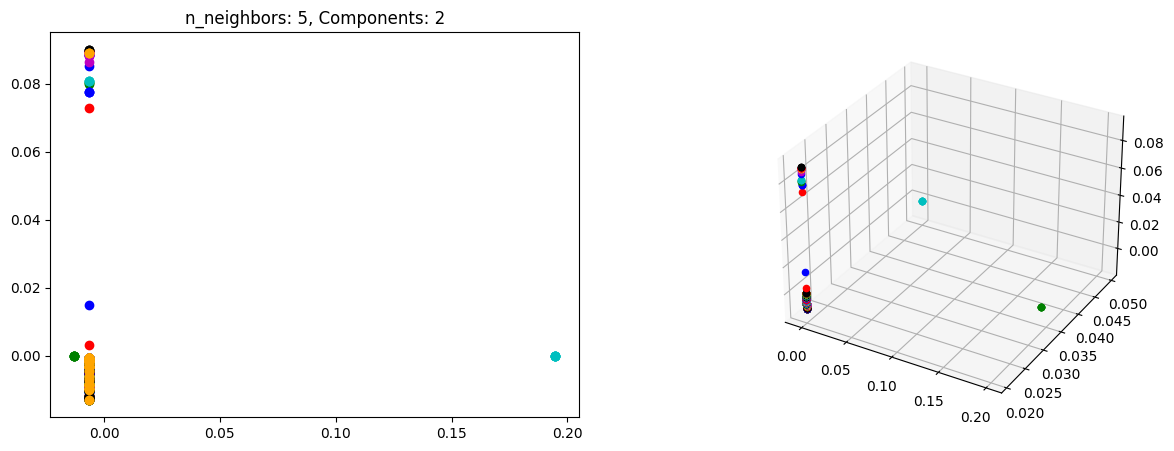

/var/folders/2x/m3nyg7x50mzg_7wsnzcm7hxr0000gn/T/ipykernel_3385/1104444180.py:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(1, len(n_components_values), i + 1, projection='3d')


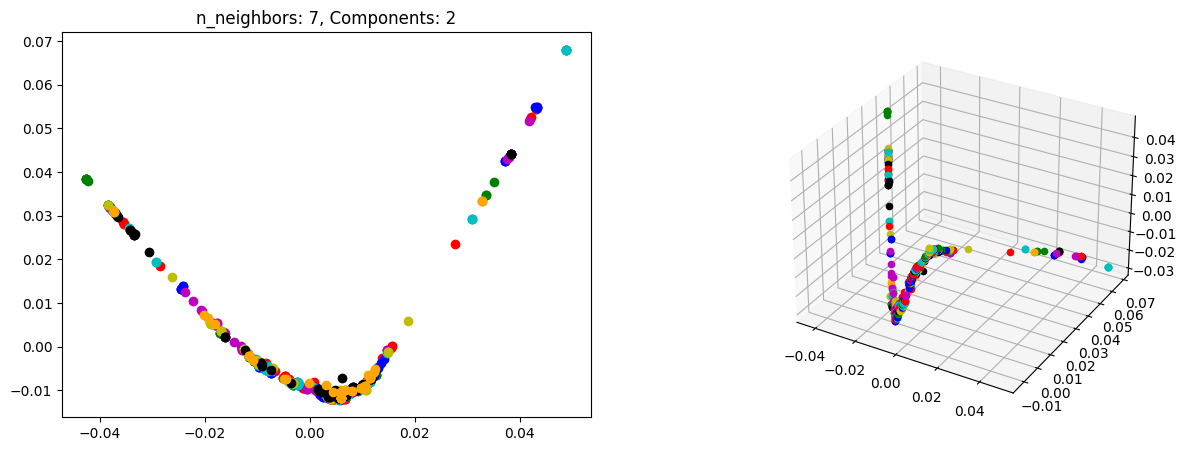

In [62]:
n_neighbors_values = [1, 2, 3, 5, 7]
n_components_values = [ 2, 3]

for n_neighbors_val in n_neighbors_values:
    plt.figure(figsize=(15, 5))
    
    for i, n_components_val in enumerate(n_components_values):
        embedding = SpectralEmbedding(n_components=n_components_val, n_neighbors=n_neighbors_val, random_state=42)
        X_embedded = embedding.fit_transform(X)
        
        plt.subplot(1, len(n_components_values), i + 1)
        plt.title(f'n_neighbors: {n_neighbors_val}, Components: {n_components_val}')
        
        if n_components_val == 1:
            for point, label in zip(X_embedded, image_labels):
                plt.scatter(point[0], 0, color=label_to_color.get(label, 'gray'))
                
        elif n_components_val == 2:
            for point, label in zip(X_embedded, image_labels):
                plt.scatter(point[0], point[1], color=label_to_color.get(label, 'gray'))
                
        elif n_components_val == 3:
            ax = plt.subplot(1, len(n_components_values), i + 1, projection='3d')
            for point, label in zip(X_embedded, image_labels):
                ax.scatter(point[0], point[1], point[2], c=label_to_color.get(label, 'gray'))
                
    plt.show()